In [1]:
import iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime
import numpy as np
import iris.coords as icoords
import iris.coord_categorisation
import iris.quickplot as qplt 
import numpy.ma as ma
from iris.util import broadcast_to_shape

In [2]:
#defining a function to calculate global average T
def area_average(cube):
    
    if cube.coord('latitude').bounds is None:
        cube.coord('latitude').guess_bounds()
        cube.coord('longitude').guess_bounds()
    
    grid_areas = iris.analysis.cartography.area_weights(cube)
    average = cube.collapsed(['latitude','longitude'],iris.analysis.MEAN, weights=grid_areas)
    
    return average

In [3]:
#defining function to merge cube list into single large cube
def time_reset(cubes): 
    
    time_coord = cubes[0].coord('time')
    n=1
    for cube in cubes:
        cube.remove_coord('time')
        cube.add_dim_coord(time_coord,0)
        cube.remove_coord('forecast_reference_time')
        cube.remove_coord('forecast_period')
        n+=1
    
    return 

In [4]:
#defining function to merge cube list into single large cube
def merge_cubes(cubes): 
    
    """
    Merge all ensemble members into one cube
    All cubes given the same time coordinate
    """

    big_cube = iris.cube.CubeList()
    n=1
    for cube in cubes:
        ensemble_coord = icoords.AuxCoord(n, standard_name='realization')
        new_cube = cube.copy()
        new_cube.add_aux_coord(ensemble_coord)
        big_cube.append(new_cube)
        n+=1
    
    return big_cube.merge_cube()

In [5]:
#defining function to merge cube list into single large cube
def merge_cubes_again(cubes): 
    
    """
    Merge all ensemble members into one cube
    All cubes given the same time coordinate
    """

    big_cube = iris.cube.CubeList()
    for cube in cubes:
        new_cube = cube.copy()
        big_cube.append(new_cube)
    
    return big_cube.merge_cube()

In [6]:
dir_in_coupled = '/shared/netscratch/lrm49/Laura/'
coupled_cntl = ['u-bu651','u-bv666','u-bv668','u-bv669','u-bv670','u-bv674','u-bv676','u-bv677','u-bv678']
july_el = ['u-bw764'] 
july_la = ['u-bw758', 'u-bw761', 'u-bw762', 'u-bw766'] 
july_ne = ['u-bv020', 'u-bw763', 'u-bw765', 'u-bw767']
jan_el = ['u-ca322', 'u-ca325', 'u-ca331'] 
jan_la = ['u-ca323', 'u-ca324', 'u-ca326', 'u-ca328'] 
jan_ne = ['u-ca327', 'u-ca330' ]

In [7]:
#loading in ocean-land mask
my_mask = iris.load_cube('/shared/netscratch/lrm49/UKCA_VN112_TEST_SIMS/land_mask_bm249_da19910701_00.nc')[0,0]

#Setting zero values to true to mask ocean points
no_ocean = np.logical_not(my_mask.data)


/home/lw602/.conda/envs/py27iris/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1935: UserWarning: Ignoring netCDF variable u'surface' invalid units u'level'
  warnings.warn(msg.encode('ascii', errors='backslashreplace'))


In [8]:
#setting NH constraint
NH_constraint = iris.Constraint(latitude=lambda v: 40 <= v <= 75)

In [9]:
## El Nino ##
sat_elnino = iris.cube.CubeList()
for job_id in july_el:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    sst_cube.data = ma.array(sst_cube.data, mask=broadcast_to_shape(no_ocean,sst_cube.shape,[1,2]))
    sst_nh = sst_cube.extract(NH_constraint)
    sst_cube_gm = area_average(sst_nh)
    time_limit = sst_cube_gm[6:120]

    sat_elnino.append(time_limit)
    
for job_id in jan_el:
    
    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    sst_cube.data = ma.array(sst_cube.data, mask=broadcast_to_shape(no_ocean,sst_cube.shape,[1,2]))
    sst_nh = sst_cube.extract(NH_constraint)
    sst_cube_gm = area_average(sst_nh)
    time_limit = sst_cube_gm[0:114]

    sat_elnino.append(time_limit)

In [10]:
## La Nina ##
sat_lanina = iris.cube.CubeList()
for job_id in july_la:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    sst_cube.data = ma.array(sst_cube.data, mask=broadcast_to_shape(no_ocean,sst_cube.shape,[1,2]))
    sst_nh = sst_cube.extract(NH_constraint)
    sst_cube_gm = area_average(sst_nh)
    time_limit = sst_cube_gm[6:120]

    sat_lanina.append(time_limit)
    
for job_id in jan_la:
    
    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    sst_cube.data = ma.array(sst_cube.data, mask=broadcast_to_shape(no_ocean,sst_cube.shape,[1,2]))
    sst_nh = sst_cube.extract(NH_constraint)
    sst_cube_gm = area_average(sst_nh)
    time_limit = sst_cube_gm[0:114]

    sat_lanina.append(time_limit)

In [11]:
## Neutral ##
sat_neutral = iris.cube.CubeList()
for job_id in july_ne:

    dynamic_cube = iris.load(dir_in_coupled+'Samalas_July/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    sst_cube.data = ma.array(sst_cube.data, mask=broadcast_to_shape(no_ocean,sst_cube.shape,[1,2]))
    sst_nh = sst_cube.extract(NH_constraint)
    sst_cube_gm = area_average(sst_nh)
    time_limit = sst_cube_gm[6:120]

    sat_neutral.append(time_limit)
    
for job_id in jan_ne:
    
    dynamic_cube = iris.load(dir_in_coupled+'Samalas_Jan/'+job_id+'_dynamics_vars.nc')
    sst_cube = dynamic_cube.extract('surface_temperature')[0]
    sst_cube.data = ma.array(sst_cube.data, mask=broadcast_to_shape(no_ocean,sst_cube.shape,[1,2]))
    sst_nh = sst_cube.extract(NH_constraint)
    sst_cube_gm = area_average(sst_nh)
    time_limit = sst_cube_gm[0:114]

    sat_neutral.append(time_limit)

In [12]:
## CONTROL ##
control = iris.cube.CubeList()
for job_id_2 in coupled_cntl:

    control_cube = iris.load(dir_in_coupled+'Control/'+job_id_2+'_dynamics_vars.nc')
    sst_control = control_cube.extract('surface_temperature')[0]
    sst_control.data = ma.array(sst_control.data, mask=broadcast_to_shape(no_ocean,sst_control.shape,[1,2]))
    sst_nh = sst_control.extract(NH_constraint)
    sst_control_gm = area_average(sst_nh)[0:114]

    control.append(sst_control_gm)

In [13]:
# resetting time
time_reset(sat_elnino)
time_reset(sat_lanina)
time_reset(sat_neutral)
time_reset(control)

In [14]:
#merging cubes
sat_merged_elnino = merge_cubes(sat_elnino)
sat_merged_lanina = merge_cubes(sat_lanina)
sat_merged_neutral = merge_cubes(sat_neutral)
one_big_control = merge_cubes(control)

In [15]:
#Creating control ensemble average
mean_control = one_big_control.collapsed('realization',iris.analysis.MEAN)

/home/lw602/.conda/envs/py27iris/lib/python2.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'realization'.
  warnings.warn(msg.format(self.name()))


In [16]:
#Creating 10 year climatology
import iris.coord_categorisation
iris.coord_categorisation.add_month(mean_control,'time',name='month')
climatology_all_controls = mean_control.aggregated_by('month',iris.analysis.MEAN) 
climatology_long = np.tile(climatology_all_controls.data, 10)
climatology_short_1 = climatology_long[6:120]#compatible with july ensembles
climatology_short_2 = climatology_long[0:114]#compatible with jan ensembles


In [17]:
anom_elnino = iris.cube.CubeList()

for i in range(0,1):
    anomally_elnino = sat_merged_elnino[i] - climatology_short_1
    anom_elnino.append(anomally_elnino)

for i in range(1,4):
    anomally_elnino = sat_merged_elnino[i] - climatology_short_2
    anom_elnino.append(anomally_elnino)

In [18]:
anom_lanina = iris.cube.CubeList()

for i in range(0,4):
    anomally_lanina = sat_merged_lanina[i] - climatology_short_1
    anom_lanina.append(anomally_lanina)

for i in range(4,8):
    anomally_lanina = sat_merged_lanina[i] - climatology_short_2
    anom_lanina.append(anomally_lanina)

In [19]:
anom_neutral = iris.cube.CubeList()

for i in range(0,4):
    anomally_neutral = sat_merged_neutral[i] - climatology_short_1
    anom_neutral.append(anomally_neutral)

for i in range(4,6):
    anomally_neutral = sat_merged_neutral[i] - climatology_short_2
    anom_neutral.append(anomally_neutral)

In [20]:
anom_elnino_full = merge_cubes_again(anom_elnino)
anom_lanina_full = merge_cubes_again(anom_lanina)
anom_neutral_full = merge_cubes_again(anom_neutral)

In [21]:
#Taking ensemble mean anomalies by grouping
mean_anomally_elnino = anom_elnino_full.collapsed('realization',iris.analysis.MEAN)
mean_anomally_lanina = anom_lanina_full.collapsed('realization',iris.analysis.MEAN)
mean_anomally_neutral = anom_neutral_full.collapsed('realization',iris.analysis.MEAN)

In [22]:
#Taking anomalies at 6 month intervals 
summer_elnino_anomalies = []

start = mean_anomally_elnino[0]
summer_6_elnino = mean_anomally_elnino[6]
summer_12_elnino = mean_anomally_elnino[12]
summer_18_elnino = mean_anomally_elnino[18]
summer_24_elnino = mean_anomally_elnino[24]
summer_30_elnino = mean_anomally_elnino[30]

summer_elnino_anomalies.append(start.data) 
summer_elnino_anomalies.append(summer_6_elnino.data) 
summer_elnino_anomalies.append(summer_12_elnino.data)
summer_elnino_anomalies.append(summer_18_elnino.data)
summer_elnino_anomalies.append(summer_24_elnino.data)
summer_elnino_anomalies.append(summer_30_elnino.data)

In [23]:
#Taking anomalies at 6 month intervals 
summer_lanina_anomalies = []

start = mean_anomally_lanina[0]
summer_6_lanina = mean_anomally_lanina[6]
summer_12_lanina = mean_anomally_lanina[12]
summer_18_lanina = mean_anomally_lanina[18]
summer_24_lanina = mean_anomally_lanina[24]
summer_30_lanina = mean_anomally_lanina[30]

summer_lanina_anomalies.append(start.data) 
summer_lanina_anomalies.append(summer_6_lanina.data) 
summer_lanina_anomalies.append(summer_12_lanina.data)
summer_lanina_anomalies.append(summer_18_lanina.data)
summer_lanina_anomalies.append(summer_24_lanina.data)
summer_lanina_anomalies.append(summer_30_lanina.data)

In [25]:
#Taking anomalies at 6 month intervals 
summer_neutral_anomalies = []

start = mean_anomally_neutral[0]
summer_6_neutral = mean_anomally_neutral[6]
summer_12_neutral = mean_anomally_neutral[12]
summer_18_neutral = mean_anomally_neutral[18]
summer_24_neutral = mean_anomally_neutral[24]
summer_30_neutral = mean_anomally_neutral[30]

summer_neutral_anomalies.append(start.data) 
summer_neutral_anomalies.append(summer_6_neutral.data) 
summer_neutral_anomalies.append(summer_12_neutral.data)
summer_neutral_anomalies.append(summer_18_neutral.data)
summer_neutral_anomalies.append(summer_24_neutral.data)
summer_neutral_anomalies.append(summer_30_neutral.data)

In [26]:
time = range(0,120)

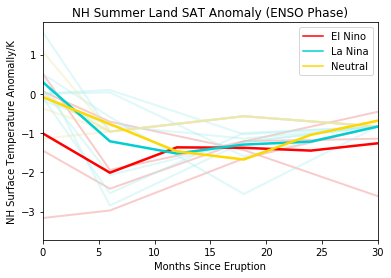

In [27]:
plt.figure(figsize=(6,4))

### PLOTTING EL NINO ENSEMBLES ###

for cube in anom_elnino_full.slices_over('realization'): # loop through ensemble members
    summer_elnino_anomalies_2 = []

    time_0 = cube[0]
    time_6 = cube[6]
    time_18 = cube[18]
    time_30 = cube[30]
    time_36 = cube[36]
    time_48 = cube[48]
    time_60 = cube[60]
    time_72 = cube[72]
    

    summer_elnino_anomalies_2.append(time_0.data) 
    summer_elnino_anomalies_2.append(time_6.data) 
    summer_elnino_anomalies_2.append(time_18.data) 
    summer_elnino_anomalies_2.append(time_30.data)
    summer_elnino_anomalies_2.append(time_36.data)
    summer_elnino_anomalies_2.append(time_48.data)
    summer_elnino_anomalies_2.append(time_60.data)



    plt.plot([time[0],time[6], time[18], time[30], time[36], time[48], time[60]], 
         summer_elnino_anomalies_2, 
         color='lightcoral', alpha = 0.4, lw=2)#plotting mean
    
### PLOTTING LA NINA ENSEMBLES ###
    
for cube in anom_lanina_full.slices_over('realization'): # loop through ensemble members
    summer_lanina_anomalies_2 = []

    time_0 = cube[0]
    time_6 = cube[6]
    time_18 = cube[18]
    time_12 = cube[30]
    time_36 = cube[36]
    time_48 = cube[48]
    time_60 = cube[60]
    time_72 = cube[72]
    

    summer_lanina_anomalies_2.append(time_0.data) 
    summer_lanina_anomalies_2.append(time_6.data)  
    summer_lanina_anomalies_2.append(time_18.data) 
    summer_lanina_anomalies_2.append(time_30.data) 
    summer_lanina_anomalies_2.append(time_36.data)
    summer_lanina_anomalies_2.append(time_48.data)
    summer_lanina_anomalies_2.append(time_60.data)
 

    plt.plot([time[0],time[6], time[18], time[30], time[36], time[48], time[60]], 
         summer_lanina_anomalies_2, 
         color='paleturquoise', alpha = 0.4, lw=2)#plotting mean
    
### PLOTTING NEUTRAL ENSEMBLES ###

for cube in anom_neutral_full.slices_over('realization'): # loop through ensemble members
    summer_neutral_anomalies_2 = []

    time_0 = cube[0]
    time_12 = cube[6]
    time_12 = cube[18]
    time_12 = cube[30]
    time_36 = cube[36]
    time_48 = cube[48]
    time_60 = cube[60]
    time_72 = cube[72]
    

    summer_neutral_anomalies_2.append(time_0.data) 
    summer_neutral_anomalies_2.append(time_6.data)
    summer_neutral_anomalies_2.append(time_18.data)
    summer_neutral_anomalies_2.append(time_30.data)
    summer_neutral_anomalies_2.append(time_36.data)
    summer_neutral_anomalies_2.append(time_48.data)
    summer_neutral_anomalies_2.append(time_60.data)
 

    plt.plot([time[0], time[6], time[18], time[30], time[36], time[48], time[60]], 
         summer_neutral_anomalies_2, 
         color='palegoldenrod', alpha = 0.4, lw=2)#plotting mean 


### PLOTTING ENSEMBLE MEANS ####
from matplotlib.lines import Line2D

plt.plot([time[0], time[6], time[12], time[18], time[24], time[30]], 
         summer_elnino_anomalies, color='red',lw=2.5)#plotting mean

plt.plot([time[0], time[6], time[12], time[18], time[24], time[30]], 
         summer_lanina_anomalies, color='darkturquoise',lw=2.5)#plotting mean

plt.plot([time[0], time[6], time[12], time[18], time[24], time[30]], 
         summer_neutral_anomalies, color='gold',lw=2.5)#plotting mean

plt.xlim(time[0],time[30]) # plot only 5 years


plt.title('NH Summer Land SAT Anomaly (ENSO Phase)')
plt.xlabel('Months Since Eruption')
plt.ylabel('NH Surface Temperature Anomally/K')
elnino_line = Line2D([0], [0], label='El Nino', color='red')
lanina_line = Line2D([0], [0], label='La Nina', color='darkturquoise')
neutral_line = Line2D([0], [0], label='Neutral', color='gold')
plt.legend(handles=[elnino_line, lanina_line, neutral_line])

plt.savefig('SAT_by_ENSO.pdf')
